# A2Z Insurance 

## General Context

Finding new customers is vital in every industry. The process for finding new
customers begins by learning as much as possible from the existing customers.
Understanding current customers allow organizations to identify groups of
customers that have different product interests, different market
participation, or different response to marketing efforts. With this, we will
be able not only to serve better our customers, but also to improve the
targeting of prospective customers.

Market segmentation, the process of identifying customers’ groups, makes use
of geographic, demographic, psychographic, and behavioral characteristics of
customers. By understanding the differences between the different segments,
organizations can make better strategic choices about opportunities, product
definition, positioning, promotions, pricing, and target marketing.

## Business Situation

A2Z Insurance (A2Z) is a portuguese long standing insurance company that
serves a wide array of insurance services: Motor, Household, Health, Life and
Work Compensation. Although A2Z primarily serves portuguese customers, a
significant portion of their customer acquisition comes from their web site.
Customers can sign up to A2Z services through their branches, by telephone, or
on the web site.

In 2016, A2Z became one of the largest insurers in Portugal. However, the lack
of a data driven culture in the company ultimately led to poorly maintained
databases over the years. A2Z is trying to make better use of the database it
has regarding its customers. So far, it has simply mass-marketed everything.
All potential and existing customers get the same promotions, and there are no
attempts to identify target markets for cross-selling opportunities. Now, A2Z
wants start differentiating customers, and developing more focused programs.

A2Z provided you an ABT (Analytic Based Table) with data regarding a sample of
10.290 Customers from its active database. These are customers that had at
least one insurance service with the company at the time the dataset was
extracted. Your job is to segment the database and find the relevant clusters
of customers. To do this, we suggest you segment the customers using different
perspectives and approaches, as well as combine and analyze the results. A2Z
would like to understand the value and demographics of each customer segment,
as well as understand which types of insurance they will be more interested in
buying.

## Metadata

| Variable 		      | Description                              | Additional Information |
|---------------------|------------------------------------------|------------------------|
| ID 		          | ID 		                                 |                        |
| First Policy 		  | Year of the customer’s first policy      | (1)                    |
| Birthday            | Customer’s Birthday Year                 | (2)                    |
| Education           | Academic Degree                          |                        |
| Salary              | Gross monthly salary (€) 		         |                        |
| Area 		          | Living area 		                     | (3)                    |
| Children 		      | Binary variable (Y=1) 		             |                        |
| CMV 		          | Customer Monetary Value 		         | (4)                    |
| Claims 		      | Claims Rate 		                     | (5)                    |
| Motor 		      | Premiums (€) in LOB: Motor 		         | (6)                    |
| Household 		  | Premiums (€) in LOB: Household 		     | (6)                    |
| Health 		      | Premiums (€) in LOB: Health 		     | (6)                    |
| Life 		          | Premiums (€) in LOB: Life 		         | (6)                    |
| Work Compensation   | Premiums (€) in LOB: Work Compensations  | (6)                    |

## Additional Information

1. May be considered as the first year as a customer
2. The current year of the database is 2016
3. No further information provided about the meaning of the area codes
4. Lifetime value = (annual profit from the customer) X (number of years that they are a customer) - (acquisition cost)
5. Amount paid by the insurance company (€)/ Premiums (€) Note: in the last 2 years
6. Annual Premiums (2016). Negative premiums may manifest reversals occurred in the current year, paid in previous one(s).

Notice the data was stored in a SAS database file. There may be some intricacies when
reading this file type using Python. Make sure the data is being
imported properly and that you remove (before or after converting it to a
pandas data frame) any irrelevant rows/columns you may find.

## Expected outcomes

1. Explore the data and identify the variables that should be used to segment customers.
2. Identify customer segments
3. Justify the number of clusters you chose (taking in consideration the business use as well).
4. Explain the clusters found.
5. Suggest business applications for the findings and define general marketing
   approaches for each cluster.

**Note:** Invest time into evaluating your preprocessing pipeling, thinking
how you want to do your clustering, possible approaches, and advantages or
disadvantages of different decisions.


---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_sas('a2z_insurance.sas7bdat')

---
### Exploratory Data Analysis

In [3]:
df

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91


In [4]:
df.dtypes

CustID           float64
FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [5]:
pd.concat([df.isnull().sum(),df.eq('').sum()],keys=['Nulls','Empty Strings'],axis=1)

,Nulls,Empty Strings
CustID,0,0
FirstPolYear,30,0
BirthYear,17,0
EducDeg,17,0
MonthSal,36,0
GeoLivArea,1,0
Children,21,0
CustMonVal,0,0
ClaimsRate,0,0
PremMotor,34,0


In [6]:
df.duplicated().sum()

0

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,10296.0,5148.500000,2972.343520,1.00,2574.75,5148.50,7722.2500,10296.00
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80


---
Histogram and boxlots before outlier removal via IQR-Method

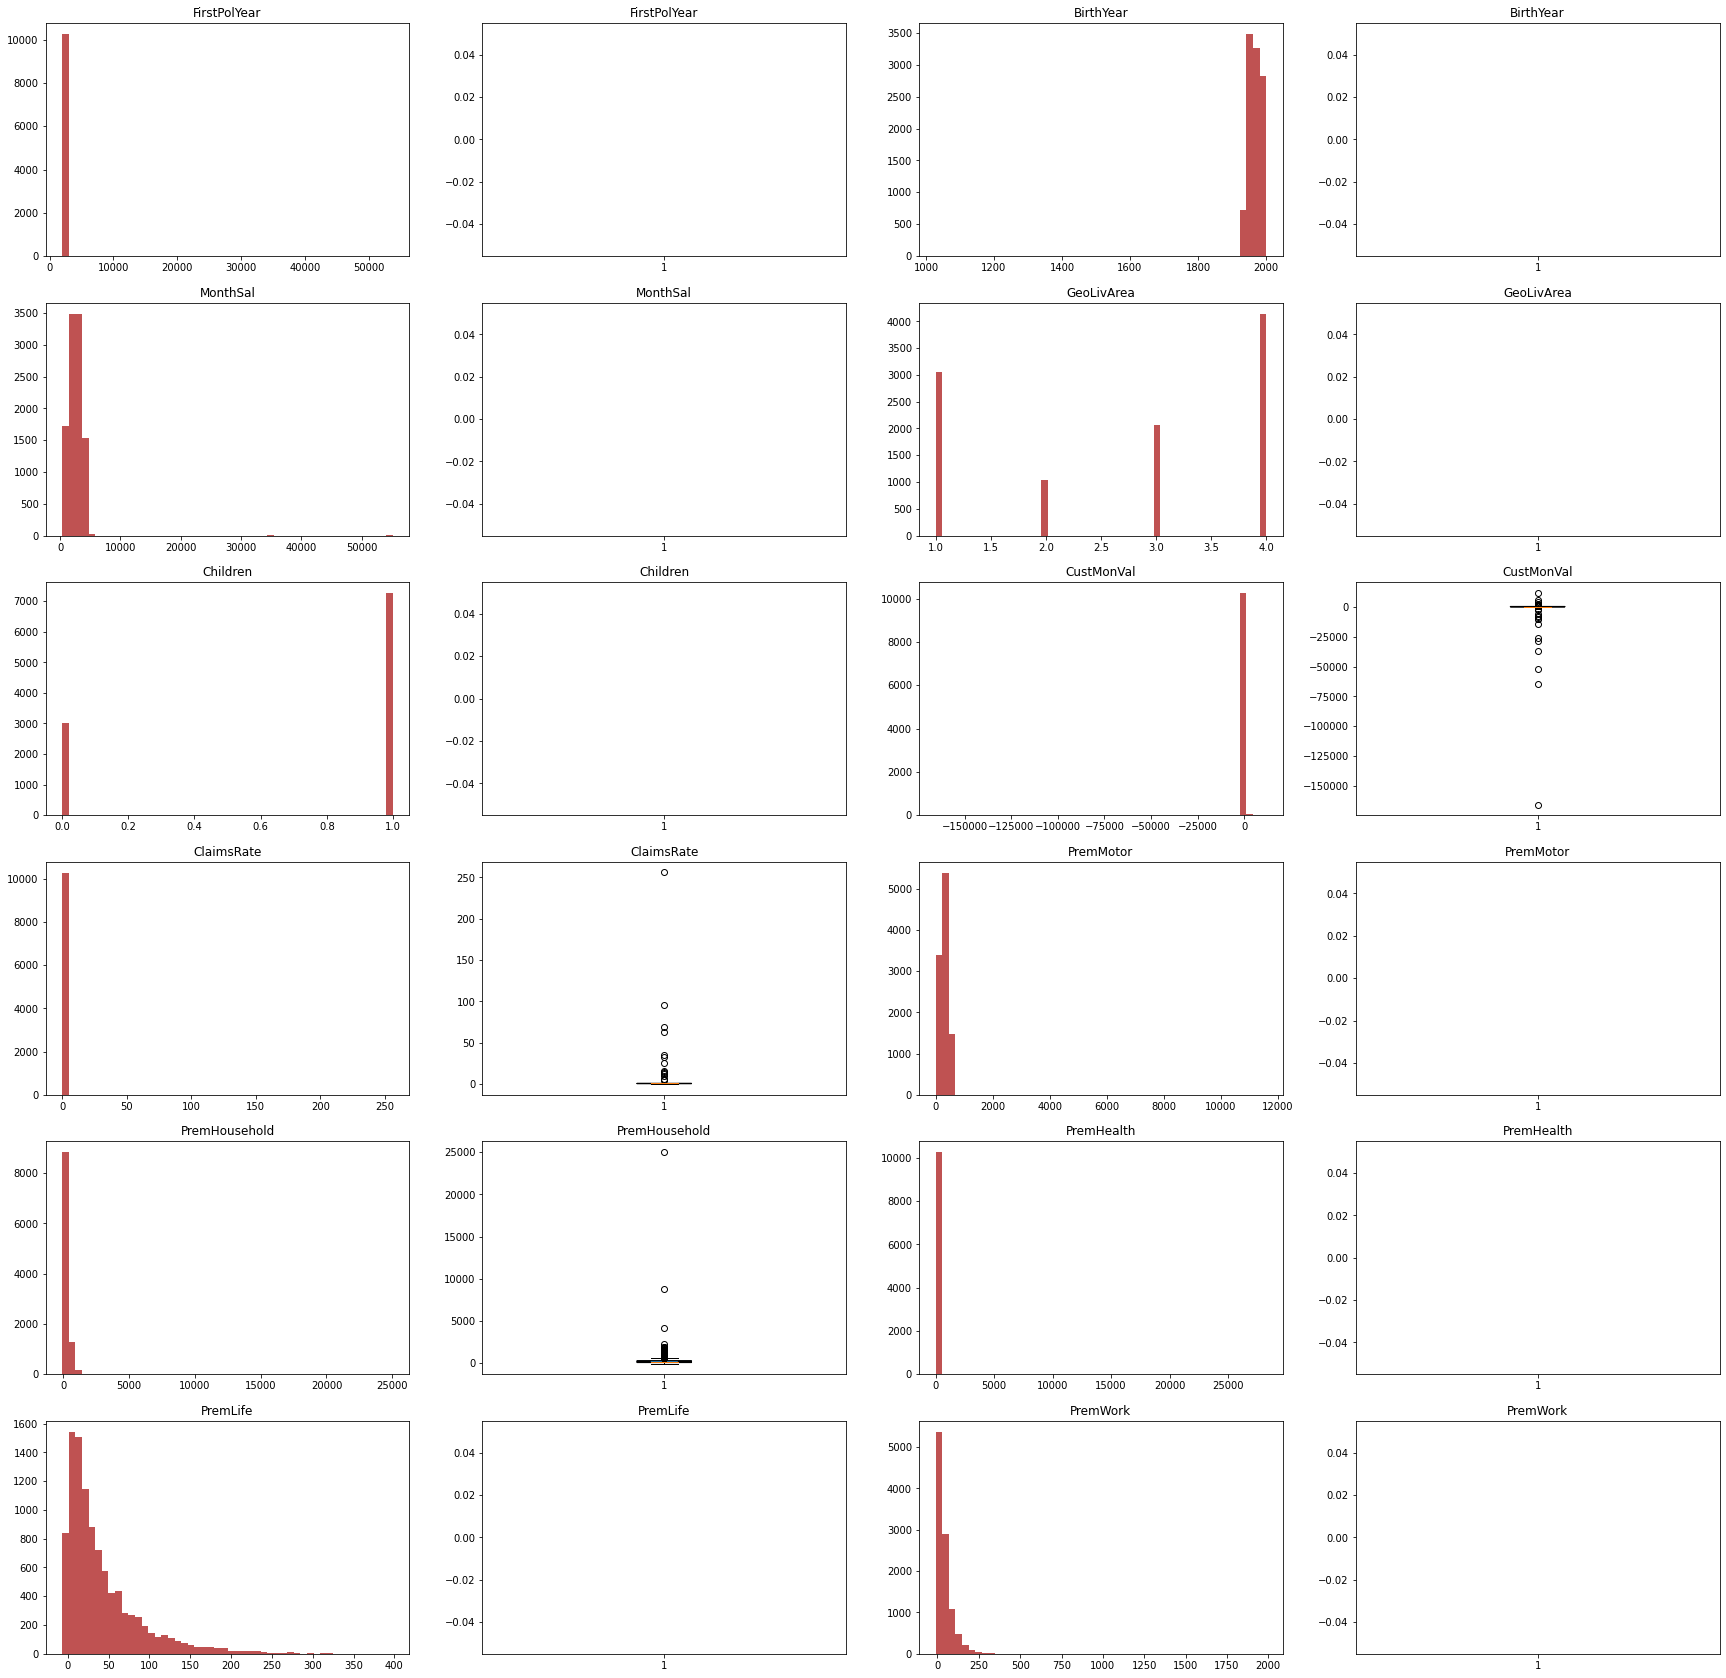

In [8]:
df_numeric_features = list(df.select_dtypes(include = np.number).columns)
df_numeric_features.remove('CustID')

fig, ax = plt.subplots(math.ceil(len(df_numeric_features)/2),4, figsize = (30,30))
ax_flat1 = list(ax.flatten())[::2]
ax_flat2 = list(ax.flatten())[1::2]
for i, feat in zip(range(len(ax_flat1)), df_numeric_features):
    ax_flat1[i].hist(df[feat], bins = 50, color = '#bf5252')
    ax_flat2[i].boxplot(df[feat], notch = True, patch_artist = True)
    ax_flat1[i].set_title(feat)
    ax_flat2[i].set_title(feat)

plt.show()

---
Histogram and boxlots after outlier removal via IQR-Method

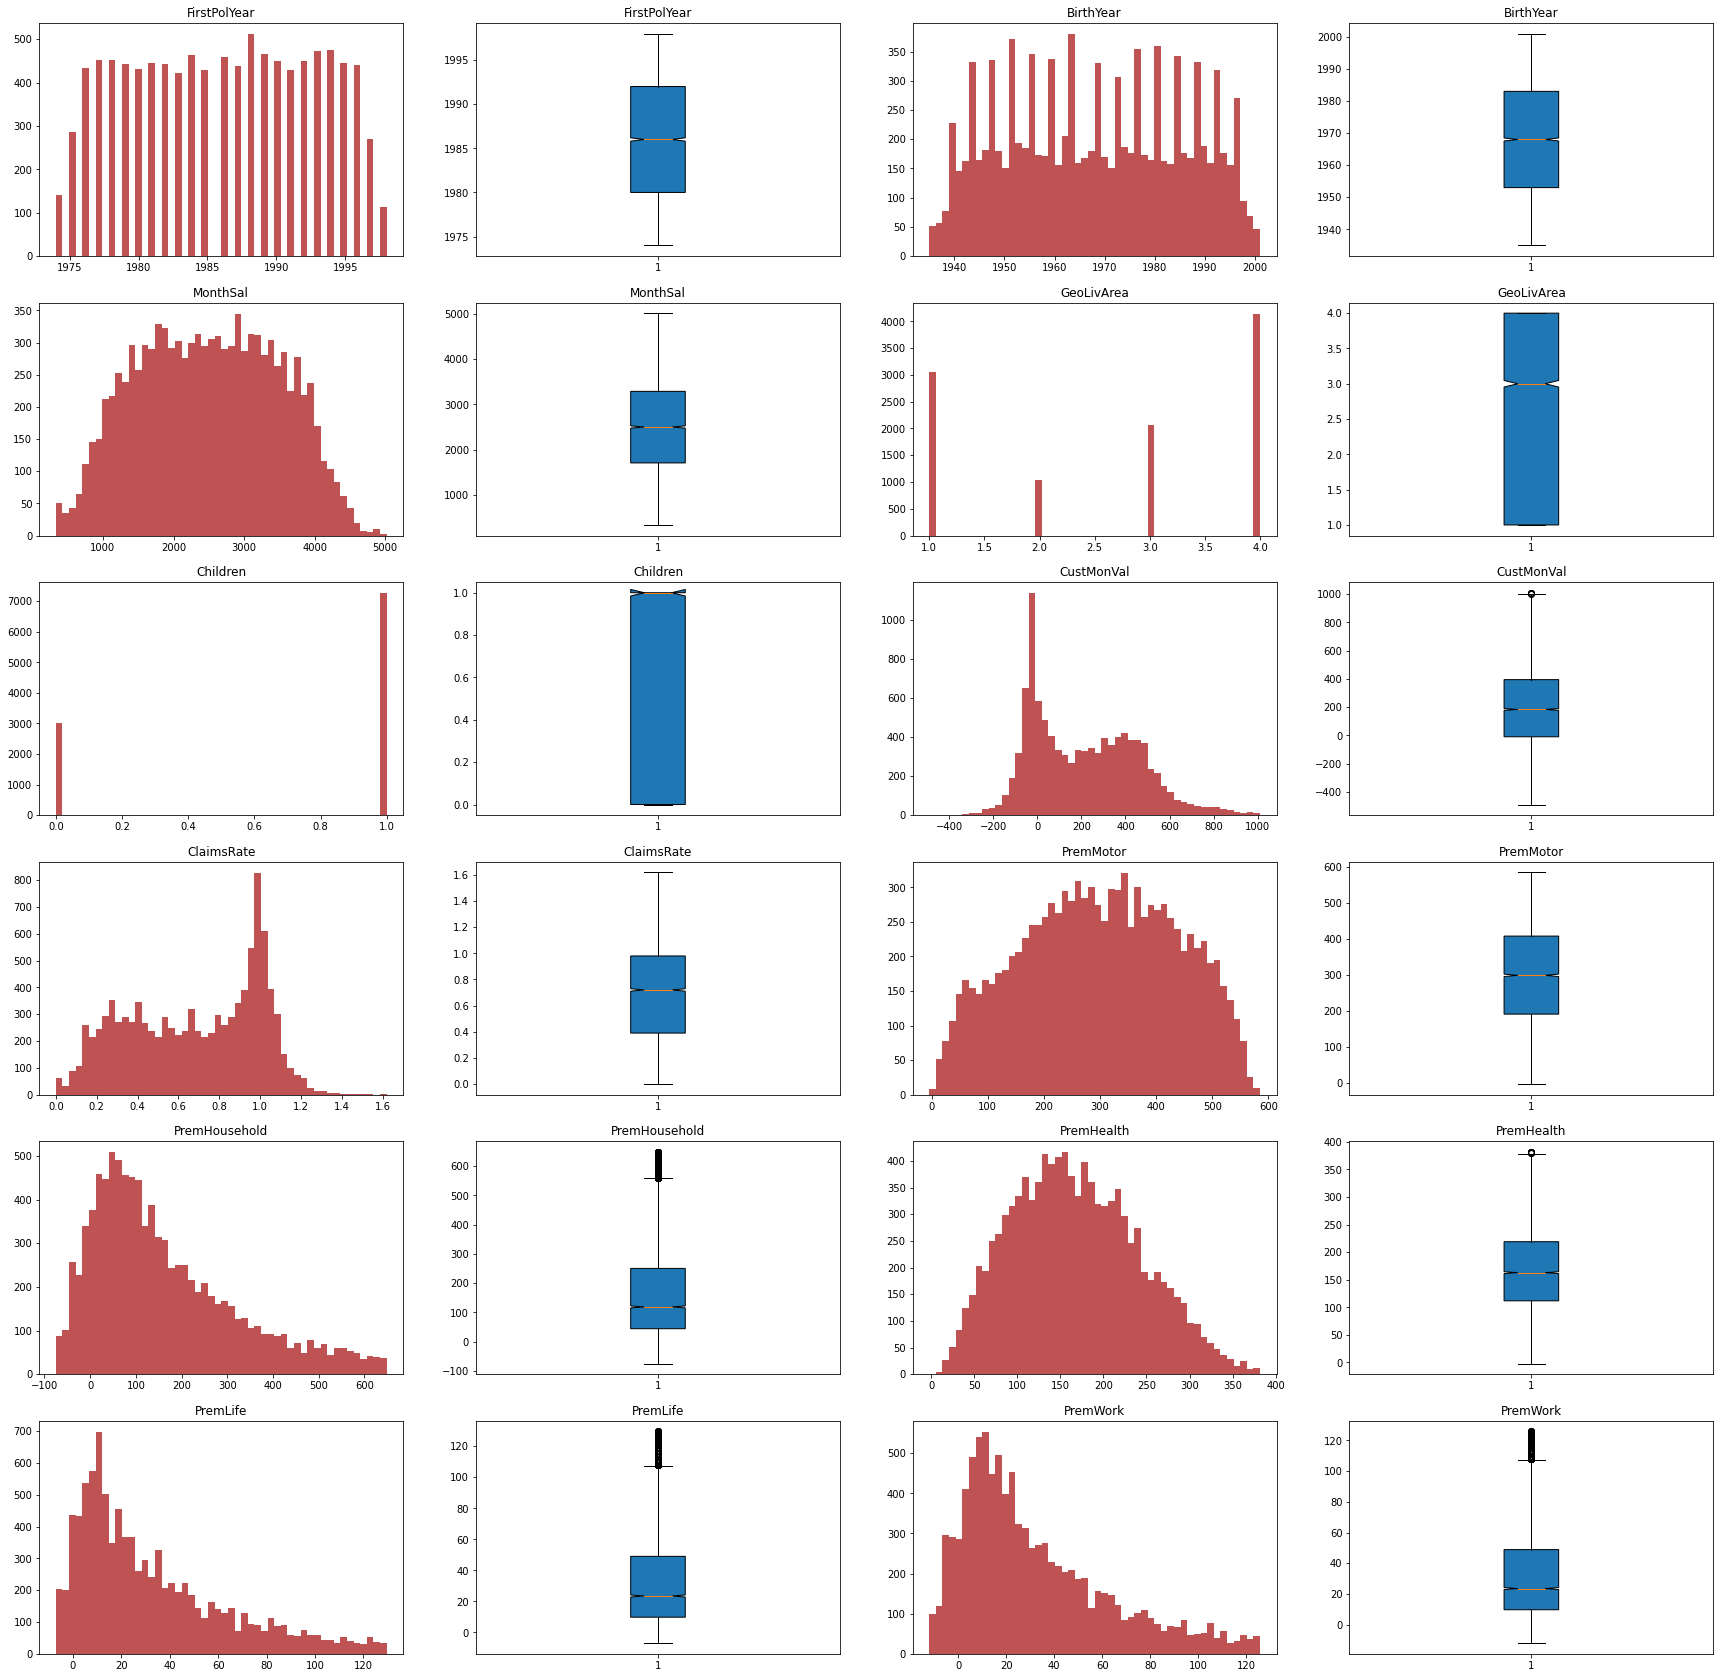

In [9]:
def outliers_removed(numeric_features):
    res = {}
    for i in numeric_features:
        q1, q3, iqr = np.nanquantile(df[i], 0.25), np.nanquantile(df[i], 0.75), np.nanquantile(df[i], 0.75) - np.nanquantile(df[i], 0.25)
        lower_bound = q1-(1.5*iqr)
        upper_bound = q3+(1.5*iqr)

        res[i] = list(df[df[i].between(lower_bound, upper_bound)][i])
    return res

out_rev = outliers_removed(df_numeric_features)

fig, ax = plt.subplots(math.ceil(len(df_numeric_features)/2),4, figsize = (30,30))
ax_flat1 = list(ax.flatten())[::2]
ax_flat2 = list(ax.flatten())[1::2]
for i, feat in zip(range(len(ax_flat1)), out_rev.keys()):
    ax_flat1[i].hist(out_rev[feat], bins = 50, color = '#bf5252')
    ax_flat2[i].boxplot(out_rev[feat], notch = True, patch_artist = True)
    ax_flat1[i].set_title(feat)
    ax_flat2[i].set_title(feat)

plt.show()

---
### Outlier evaluation

---
BirthYear
- maybe a typo for 1028. 9 & 0 is next to each other on the keyboard

In [10]:
pd.DataFrame(df.BirthYear.value_counts()).reset_index().sort_values(by = 'index')

,index,BirthYear
67,1028.0,1
65,1935.0,14
63,1936.0,37
62,1937.0,57
60,1938.0,77
...,...,...
55,1997.0,133
59,1998.0,94
61,1999.0,69
64,2000.0,35


---
FirstPolYear
- kick this outlier since it doesn't make any sense

In [11]:
pd.DataFrame(df.FirstPolYear.value_counts()).reset_index().sort_values(by = 'index')

,index,FirstPolYear
23,1974.0,141
21,1975.0,285
16,1976.0,433
6,1977.0,453
7,1978.0,453
13,1979.0,443
17,1980.0,432
10,1981.0,445
12,1982.0,444
20,1983.0,423


---
MonthSal
- we will keep the two MonthSal outliers at first and check the performance

In [12]:
pd.DataFrame(df.MonthSal.value_counts()).reset_index().sort_values(by = 'index')

,index,MonthSal
1451,333.0,3
2855,334.0,1
1243,335.0,3
3205,336.0,1
3489,340.0,1
...,...,...
3107,4904.0,1
3139,4995.0,1
3005,5021.0,1
2865,34490.0,1


---
CustMonVal
- probably IQR-Method?

In [13]:
pd.DataFrame(df.CustMonVal.value_counts()).reset_index().sort_values(by = 'index')

,index,CustMonVal
5254,-165680.42,1
5365,-64891.00,1
5501,-52382.76,1
3359,-37327.08,1
5529,-28945.40,1
...,...,...
4780,2054.07,1
6265,2314.21,1
2533,4328.50,1
1908,5596.84,1


In [14]:
pd.DataFrame(pd.Series(out_rev['CustMonVal']).value_counts()).reset_index().sort_values(by = 'index')

,index,0
2830,-490.20,1
3120,-416.73,1
5500,-406.07,1
5417,-402.96,1
2495,-386.18,1
...,...,...
3950,1000.75,1
4893,1003.64,1
6143,1008.74,1
2622,1009.30,1


---
ClaimsRate

In [15]:
pd.DataFrame(df.ClaimsRate.value_counts()).reset_index().sort_values(by = 'index')

,index,ClaimsRate
95,0.00,58
134,0.01,2
127,0.03,4
124,0.04,5
120,0.05,8
...,...,...
163,35.00,1
149,63.00,1
147,69.00,1
160,96.00,1
